## Introduction

Our e-learning company are offering courses on programming including web & mobile development. Besides, the platform also covers many other domains, like data science and game development. Since we want to promote the product and we'd like to invest some money in advertisement

Overall, the goal is we want to **find out the two best markets to advertise the products**

## Understanding the data

We can try to search existing data that might be relevant for our purpose. One good candidate is data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/)

[FreeCodeCamp](https://www.freecodecamp.org/) is a free learning platform offering courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests, which is ideal for the purpose of our analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Exploring the shape of the dataset
new_coder = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
print(new_coder.shape)

(18175, 136)


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
# Get a glimsp of the data
print(new_coder.head())

    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls         ...           \
0                   NaN                 

In [4]:
# Find relevant columns for our analysis 
print(new_coder.columns)

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)


### Conclusion
The dataset has a total of 136 columns, besides columns describing personal information such as age, marital status and educational status, most of the columns containing binary answers to questions such as: which platform the respondents use or what podcast they listen to when learning how to code.

### Discussion
Instead of organizing a survey, which can takes a lot of time and requires budget as well as responses, using a ready-made data will simplify the job and save time for us

The 2017 New Coder Survey data is about their approach on learning how to code and it includes additional background information such as: their personal information (do they have a college degree, how old they are, are they working or unemployed and what field are they working in, etc., the platform they are using to code, what tech specific career they are pursuing, etc.

The purpose of our project is to take a deeper look into this dataset and pick out 2 most popular platform to advertise our web-development & e-related courses.

To download the dataset, go to this [link](https://github.com/freeCodeCamp/2017-new-coder-survey)

## Checking for Sample Representativity

There are some **questions** we want to answer:
- Where are these new coders located
- What are the locations with the greatest number of new coders
- How much money new coders are willing to spend on learning

In [5]:
role_percentages = (new_coder['JobRoleInterest'].value_counts(dropna = True, 
                                                             ascending = False, normalize = True) * 100).reset_index()

print(role_percentages)

                                                  index  JobRoleInterest
0                              Full-Stack Web Developer        11.770595
1                               Front-End Web Developer         6.435927
2                                        Data Scientist         2.173913
3                                Back-End Web Developer         2.030892
4                                      Mobile Developer         1.673341
5                                        Game Developer         1.630435
6                                  Information Security         1.315789
7     Full-Stack Web Developer,   Front-End Web Deve...         0.915332
8       Front-End Web Developer, Full-Stack Web Deve...         0.800915
9                                       Product Manager         0.786613
10                                        Data Engineer         0.758009
11                             User Experience Designer         0.743707
12      User Experience Designer,   Front-End Web D

### Observations

Out of the distribution table above, we can see that 11% of the responses focus on the full-stack development, which is beneficial to our company because we also prioritize in web & mobile development.

6% of the next responses were about front-end web development, followed by data scientists. Overall, we can see that the majority of the learners are interested in pursuing web-development courses as well as data science path. Besides, 80% of the rest are still unsure about the path they will focus on, but we can tell that most of them are full-stack web development related.

Still, since 80% of the responses were interested in more than 1 object, the dataset is considered to be not representative enough.

## New Coders - Locations & Densities

In [6]:
# Drop the rows where participants didn't asnwer what role they are interest in
new_coder['JobRoleInterest'].dropna(inplace = True)

In [7]:
print(new_coder['JobRoleInterest'].value_counts())

Full-Stack Web Developer                                                                                                                                                                           823
  Front-End Web Developer                                                                                                                                                                          450
  Data Scientist                                                                                                                                                                                   152
Back-End Web Developer                                                                                                                                                                             142
  Mobile Developer                                                                                                                                                                                 117
Game 

In [8]:
# Generate a frequency table for the CountryLive variable
relative_freq = new_coder['CountryLive'].value_counts(normalize = True) * 100
print(relative_freq.head(4))

United States of America    37.760824
India                        9.128847
United Kingdom               4.936098
Canada                       4.016693
Name: CountryLive, dtype: float64


Out of the country the respondents are living in, more than 1/3 is living in the United States, 9% are people living in India, the next 2 countries with the same percentages (4%) are United Kingdom and Canada. The rest of the responses are distributed across different countries around the world.

Overall, we can see that technology development is prospering more in the Western countries, predominantly in the US, comparing to the rest of the world (with India as an exception). Therefore, when targeting our ads, we can prioritirze US and India to boost the revenues.



In [9]:
absolute_freq = round(relative_freq)
print(absolute_freq.head(4))

United States of America    38.0
India                        9.0
United Kingdom               5.0
Canada                       4.0
Name: CountryLive, dtype: float64


After deciding US and India as our 2 advertising countries, we might need to dig deeper into the potential candidates such as Canada and the UK since the technology industry in these countries are growing with the rising. As of the time of analyzing this dataset (2021), with the effect of Covid pandemic and the need for social distancing, more & more countries are relying heavily on automatic processes as well as artificial intelligence.

## Spending Money for Learning

After looking into the locations of new coders, we can go more in depth by figuring out how much money new coders are willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for our company

We will look into the `MoneyForLearning` column (USD) describing the amount of money spent by participants from the moment they started to code until the moment they complete the survey. **Our company** sells subscription at a price of $59/month

Create a new column name `money_spend_per_month` to describe the amount of money a student has spent per month by dividing `MoneyForLearning` to the `MonthsProgramming` column.

Before that, we discovered some students answer they had been learning to code for 0 months (might be that they had just started when they completed the survey). To avoid diving by 0, replace all the values of 0 with 1

In [10]:
new_coder['MonthsProgramming'] = new_coder['MonthsProgramming'].replace({0: 1})

In [11]:
# Check
print(new_coder[new_coder['MonthsProgramming'] == 0])

Empty DataFrame
Columns: [Age, AttendedBootcamp, BootcampFinish, BootcampLoanYesNo, BootcampName, BootcampRecommend, ChildrenNumber, CityPopulation, CodeEventConferences, CodeEventDjangoGirls, CodeEventFCC, CodeEventGameJam, CodeEventGirlDev, CodeEventHackathons, CodeEventMeetup, CodeEventNodeSchool, CodeEventNone, CodeEventOther, CodeEventRailsBridge, CodeEventRailsGirls, CodeEventStartUpWknd, CodeEventWkdBootcamps, CodeEventWomenCode, CodeEventWorkshops, CommuteTime, CountryCitizen, CountryLive, EmploymentField, EmploymentFieldOther, EmploymentStatus, EmploymentStatusOther, ExpectedEarning, FinanciallySupporting, FirstDevJob, Gender, GenderOther, HasChildren, HasDebt, HasFinancialDependents, HasHighSpdInternet, HasHomeMortgage, HasServedInMilitary, HasStudentDebt, HomeMortgageOwe, HoursLearning, ID.x, ID.y, Income, IsEthnicMinority, IsReceiveDisabilitiesBenefits, IsSoftwareDev, IsUnderEmployed, JobApplyWhen, JobInterestBackEnd, JobInterestDataEngr, JobInterestDataSci, JobInterestDevO

In [12]:
## Create new `money_spend_per_month` column
new_coder['money_spend_per_month'] = new_coder['MoneyForLearning'] / new_coder['MonthsProgramming']
print(new_coder['money_spend_per_month'].head())

0     25.000000
1     13.333333
2    200.000000
3      0.000000
4      0.000000
Name: money_spend_per_month, dtype: float64


In [13]:
## Coun the number of null values in the new column
print(new_coder['money_spend_per_month'].isnull().value_counts())

False    16180
True      1995
Name: money_spend_per_month, dtype: int64


In [14]:
new_coder['money_spend_per_month'].isnull().sum()

1995

In [15]:
## Drop the rows with null values
new_coder['money_spend_per_month'].dropna(inplace = True)
## Check the number of null values again
print(new_coder['money_spend_per_month'].isnull().sum())

0


In [16]:
## Remove rows with null values in `CountryLive`
new_coder = new_coder[new_coder['CountryLive'].notnull()]

Group the remaining data by the `CountryLive` column to find out how much money a student spends on average each month in the US, India, the UK & Canada

In [17]:
countries_mean = new_coder.groupby('CountryLive').mean()
countries_mean['money_spend_per_month'][['Canada', 'United Kingdom', 'United States of America', 'India']]

CountryLive
Canada                      118.434054
United Kingdom               55.774980
United States of America    206.297711
India                        66.526198
Name: money_spend_per_month, dtype: float64

Based on the results, new coders in the States are willing to pay the most for their learning. However, following the US is not India, but Canada with average money spent per month is approximately 120 dollars. United Kingdom came at last with 55 dollars per month.

The reasons might be our dataset is not representative enough because there are quite a few missing values before hand. If we consider a few social economic metrics such as GDP, it's not surprise to see people India is struggling to spend more money

It might be that we don't have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK & Canada. Or it might be that the results are correct

## Dealing with Extreme Outliers

In [18]:
import seaborn as sns

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



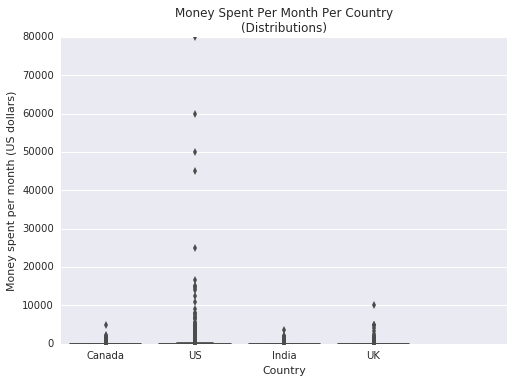

In [19]:
# Isolate the countries of interest
only_4 = new_coder[new_coder['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

sns.boxplot(x = 'CountryLive',y = 'money_spend_per_month', data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)')
plt.ylabel('Money spent per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['Canada', 'US', 'India', 'UK'])
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's quite a few outliers in the US: there are peopl who spend more than 20,000 per month, 30,000 per month or even 80,000 per month. This is not impossible, but it seems extremely unlikely, so we'll remove every values that goes over \$20,000 per month 

In [20]:
# Isolate the participants who spend less than 20000 dollar per month
new_coder = new_coder[new_coder['money_spend_per_month'] < 10000]

Now, we'll recompute the mean values and box the plots again

In [21]:
countries_mean = new_coder.groupby('CountryLive').mean()
countries_mean['money_spend_per_month'][['Canada', 'United Kingdom', 'United States of America', 'India']]

CountryLive
Canada                      118.434054
United Kingdom               55.774980
United States of America    141.079827
India                        58.384006
Name: money_spend_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



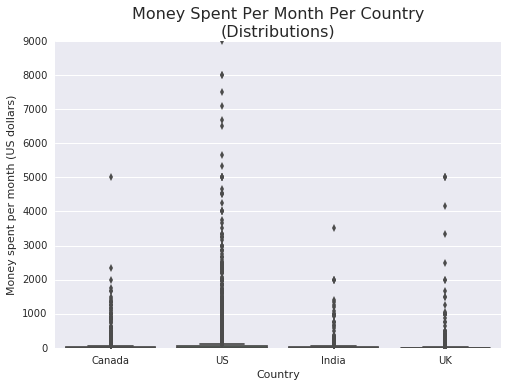

In [22]:
# Isolate again the countries of interest
only_4 = new_coder[new_coder['CountryLive'].str.contains((
    'United States of America|India|United Kingdom|Canada'), na = False)]
## Let's plot the data again
sns.boxplot(x = 'CountryLive',y = 'money_spend_per_month', data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Money spent per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['Canada', 'US', 'India', 'UK'])
plt.show()

Now, we can see better the outliers for each country, except for the UK. There are some outliers in India, which indicates there are learners who are willing to pay more than \$2,500/month. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these data points to see if we can find anything

In [23]:
money_month_india = new_coder[new_coder['CountryLive'] == 'India']
india_outliers = money_month_india[money_month_india['money_spend_per_month'] > 2500]

We can see that in India, as the time of survey, there were approximately 6 people who spent more than \$2500 per month to study for code. Specifically, 3 people spent 5000 per month and an individual spent approx. \$10,000 per month. We will extract these people and examine whether they attended any bootcamps, which might justify the large amount of money spent

In [24]:
over_5000 = money_month_india[money_month_india['money_spend_per_month'] >= 5000]
print(over_5000)

       Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
1728  24.0               0.0             NaN                NaN          NaN   
7989  28.0               0.0             NaN                NaN          NaN   
8126  22.0               0.0             NaN                NaN          NaN   

      BootcampRecommend  ChildrenNumber                 CityPopulation  \
1728                NaN             NaN  between 100,000 and 1 million   
7989                NaN             NaN  between 100,000 and 1 million   
8126                NaN             NaN            more than 1 million   

      CodeEventConferences  CodeEventDjangoGirls          ...            \
1728                   NaN                   NaN          ...             
7989                   1.0                   NaN          ...             
8126                   NaN                   NaN          ...             

      YouTubeFunFunFunction  YouTubeGoogleDev  YouTubeLearnCode  \
1728          

In [25]:
# Print out the columns name indicating whether these individuals attended Bootcamps or not
print(over_5000.filter(like = 'Bootcamp').columns)

Index(['AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'CodeEventWkdBootcamps'],
      dtype='object')


In [26]:
bootcamp_cols = ['AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'CodeEventWkdBootcamps', 'money_spend_per_month']

In [27]:
over_5000[['AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'CodeEventWkdBootcamps', 'money_spend_per_month']]

,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,CodeEventWkdBootcamps,money_spend_per_month
1728,0.0,NaN,NaN,NaN,NaN,NaN,5000.0
7989,0.0,NaN,NaN,NaN,NaN,NaN,5000.0
8126,0.0,NaN,NaN,NaN,NaN,NaN,5000.0


Based on the table above, there are 3 assumptions we might draw from:

- The individuals didn't answer the questions indicating whether they attended bootcamp or not, that' why we got NaN values
- The individuals didn't attended bootcampts. Instead, they might go to university to study coding
- These individuals might pay for a course online that lasted only 1-2 months and they were studying at the time they received the survey. That's why we got the answers as above

Besides, the survey's question was: "Asides from university tuition, about how much money have you spent on learning to code so far (US dollars)", the participants might misunderstood and counted their tuition fee into the survey. It seems safer to remove these rows

In [28]:
# Remove the outliers for India
only_4 = only_4.drop(india_outliers.index) # Using the row labels

Looking back at the box plot, we can spot some more outliers in the US. This time, we'll focus on values over \$6,000. Let's examine these participants in more detail

In [29]:
print(only_4['CountryLive'].value_counts())

United States of America    5459
India                       1215
United Kingdom               698
Canada                       578
Name: CountryLive, dtype: int64


In [30]:
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') &
    (only_4['money_spend_per_month'] >= 6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_spend_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
2404,22.0,1.0,1.0,1.0,Telegraph Academy,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,7083.333333
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
15565,23.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7500.000000


In [31]:
us_outliers['MonthsProgramming']

718       1.0
1222      2.0
2404     24.0
3184      1.0
7505      3.0
9778      1.0
15565     2.0
Name: MonthsProgramming, dtype: float64

In [32]:
us_outliers[bootcamp_cols]['money_spend_per_month'].value_counts().sort_index()

6500.000000    1
6666.666667    1
7083.333333    1
7500.000000    1
8000.000000    2
9000.000000    1
Name: money_spend_per_month, dtype: int64

From the table above, there are some interestings findings:
- 6/14 said that they didn't attend any bootcamp. However, when we look at the amount of money they spend for coding each month, the money can exceed \$15,000. This could indicated that the respondents might mistakenly include their tuition fee for university. Consequently, we'll remove those rows.

- The rest of the people indicated that they attended a boot camp and the amount of money ranging from \$6500 - \$15,000

- Besides, the data shows that 8 respondents had been programming for no more than 8 months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months. Therefore, the amount of money per month is unrealistic and they would not spend anything for the next couple of months. Hence, we'll remove every these 8 outliers

Therefore, we can decide to omit the people:
- Didn't attend the bootcamp
- Had been programming for 3 months or less when at the time they completed the survey.

In [33]:
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_spend_per_month'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]

only_4 = only_4.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_spend_per_month'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)

In [34]:
more_than_6000 = only_4[(only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_spend_per_month'] >= 6000)]

only_4 = only_4.drop(more_than_6000.index)

In [35]:
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['money_spend_per_month'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_spend_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In [36]:
canada_outliers['MonthsProgramming']

13659    2.0
Name: MonthsProgramming, dtype: float64

The situation is the same as US respondents - this participant has attended a bootcamp and has been programming for no more than 2 months when he completed the survey. We'll take the same approach her for the US and remove this outlier

In [37]:
# Remove the outlier for Canada
only_4 = only_4.drop(canada_outliers.index)

In [38]:
# Recompute the mean again
country_mean = only_4.groupby('CountryLive').mean()['money_spend_per_month']
print(country_mean)

CountryLive
Canada                      109.973801
India                        40.105751
United Kingdom               55.774980
United States of America    131.585615
Name: money_spend_per_month, dtype: float64


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



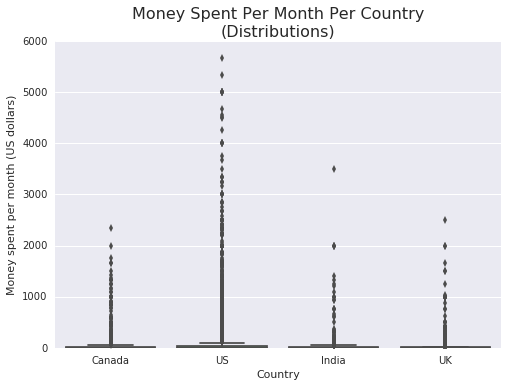

In [39]:
sns.boxplot(x = 'CountryLive',y = 'money_spend_per_month', data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Money spent per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['Canada', 'US', 'India', 'UK'])
plt.show()

## Choosing the 2 best markets

Consider the results we have so far, one country we should definitely advertise is in the US. There are a lot of new coders living there and they're willing to pay a good amount of money each month

The second market we can consider is the Canada because people are willing to pay roughly \$100/month, compared to \$66 in the India and the United Kingdom


In [40]:
only_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    68.647696
India                       15.298413
United Kingdom               8.788718
Canada                       7.265173
Name: CountryLive, dtype: float64

It's not clear what to choose between Canada and India. Canada is a good market place, but Indica might also have more potential customers 

We can have several options here:

1. Advertise completely in the US

2. Avertise in the US & Canada, or US and India by splitting the budget:
    - 70% for the US, 30% for India/Canada
    - 65% for the US, 35% for India/Canada, etc.

3. Avertise in all US, India & Canada with more strategically budget:
    - 60% in the US, 30% in Canada, 10% in India
    - 60% in the US, 25% in Canada, 15% in India, etc